In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
SA1 = gpd.read_file('data/GeoPandas Applications/Study_Area_1.shp')
SA2 = gpd.read_file('data/GeoPandas Applications/Study_Area_2.shp')
river = gpd.read_file('data/GeoPandas Applications/river.shp')


<Axes: >

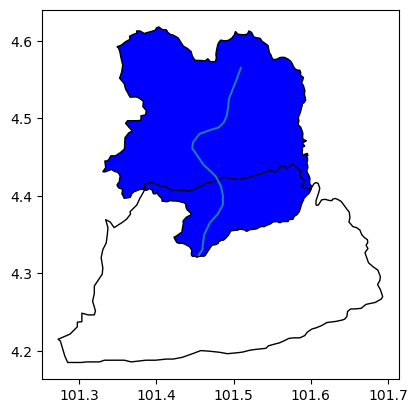

In [3]:
fig, ax=plt.subplots() 
SA1.plot(ax = ax, color ='blue', edgecolor='black')
SA2.plot(ax = ax, color ='none', edgecolor='black')
river.plot(ax =ax)


<Axes: >

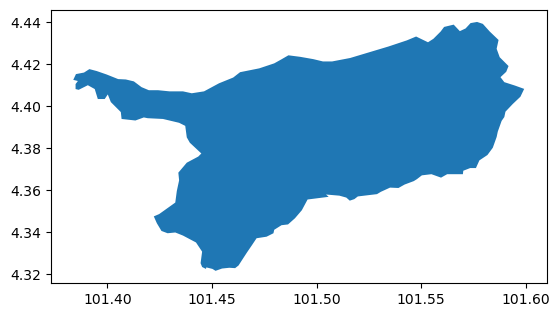

In [23]:
#intersection of polygones
intersection = gpd.overlay(SA1, SA2, how ='intersection')
intersection.plot()

<Axes: >

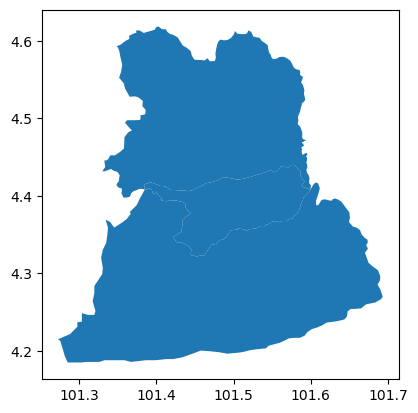

In [24]:
#Union of polygones
union = gpd.overlay(SA1, SA2, how ='union')
union.plot()

In [25]:
union.head()

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


<Axes: >

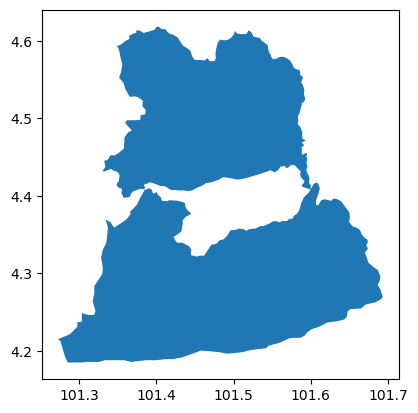

In [27]:
#Symmetric_difference of polygones
sd = gpd.overlay(SA1, SA2, how ='symmetric_difference')
sd.plot()

<Axes: >

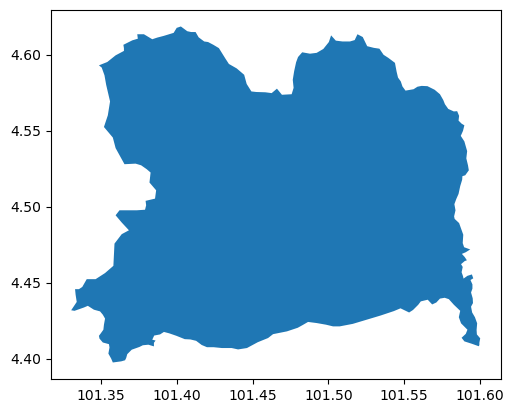

In [29]:
#difference of polygones
difference_SA1 = gpd.overlay(SA1, SA2, how ='difference')
difference_SA1.plot()

<Axes: >

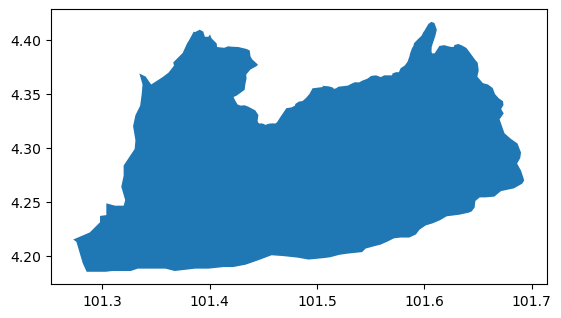

In [30]:
#difference of polygones
difference_SA2 = gpd.overlay(SA2, SA1, how ='difference')
difference_SA2.plot()

In [31]:
#dissolve
union = gpd.overlay(SA1, SA2, how ='union')
union['commun_column']=1
union.head()

,desc_1,desc_2,geometry,commun_column
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488...",1
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910...",1
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764...",1


<Axes: >

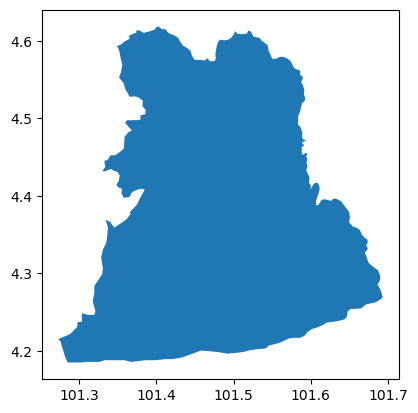

In [33]:
dissolve_sa = union.dissolve(by='commun_column')
dissolve_sa.plot()


In [34]:
dissolve_sa.head()


,geometry,desc_1,desc_2
commun_column,,,
1,"POLYGON ((101.59948 4.40801, 101.60370 4.41514...",Study_Area_1,Study_Area_2


In [35]:
#buffer

In [37]:
#check projection system of the river
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

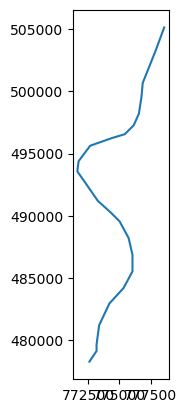

In [40]:
#Reprojecting the river geopandas DataFrame into a projected CRS
projectetd_river = river.to_crs(epsg=24547)
projectetd_river.plot()

In [41]:
projectetd_river.head()

,id,geometry
0,1,"LINESTRING (778620.752 505214.942, 777899.429 ..."


In [42]:
type(projectetd_river)

geopandas.geodataframe.GeoDataFrame

In [43]:
type(projectetd_river['geometry'])

geopandas.geoseries.GeoSeries

<Axes: >

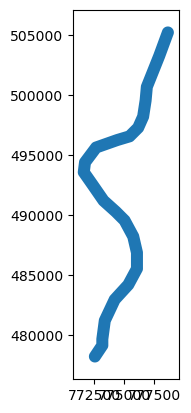

In [45]:
#We can apply buffer only on GeoSeries
buffer_500 = projectetd_river['geometry'].buffer(distance=500)
buffer_500.plot()

<Axes: >

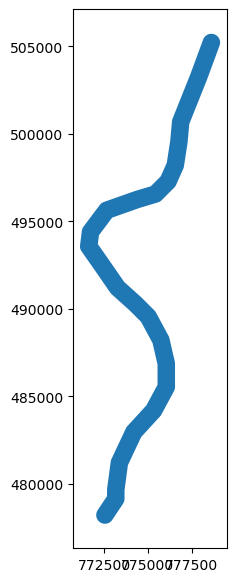

In [52]:
buffer_500.plot(figsize = (7,7))

<Axes: >

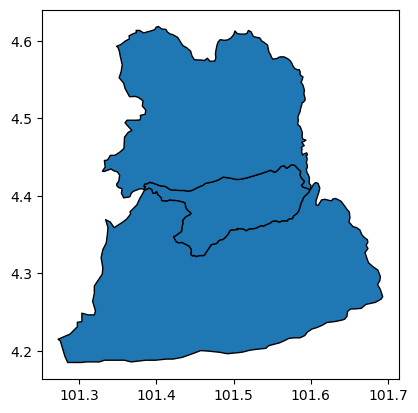

In [53]:
#Obtaining the centroid 
union = gpd.overlay(SA1, SA2, how ='union')
union.plot(edgecolor='black')

<Axes: >

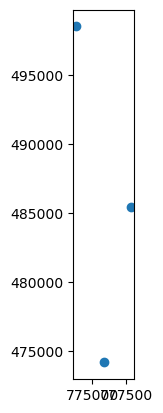

In [57]:
proj_union = union.to_crs(epsg=24547)
centroid = proj_union['geometry'].centroid
centroid.plot()